# Neural networks

We discuss neural networks in a bottom-up approach:
1. Perceptron
2. Hidden layer
3. Multi-layer perceptron

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### The Perceptron

The simplest variant of the **perceptron** consists of:
- linear combination of inputs and weights (weighted sum or dot-product)
- a threshold function $f$

Given $d$ inputs $x_1, x_2, \dots, x_d$, we compute
$$
    y = f\left(\sum_{j = 1}^d w_j x_j + w_0\right)
$$
where 
$$
    f(x) = \begin{cases}
        1 & \text{if $x > 0$}\\
        0 & \text{otherwise}
    \end{cases}
$$
is called the **activation function**, i.e., it models the stimuli in a biological neuron.

Example use-cases of the perception are learning linearly separable **logic gates**:
- learn the logical **AND-gate**
- learn the logical **OR-gate**

In [2]:
# threshold function "vectorized", so that we can apply it on numpy arrays
f = np.vectorize(lambda x: 1 if x > 0 else 0)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

# parameters chosen by hand (without machine learning)
and_gate = lambda x1, x2: f(1*x1 + 1*x2 - 1.5)
or_gate = lambda x1, x2: f(1*x1 + 1*x2 - 0.5)

print(f"AND gate outputs: {and_gate(X[:, 0], X[:, 1])}")
print(f"OR gate outputs:  {or_gate(X[:, 0], X[:, 1])}")

AND gate outputs: [0 0 0 1]
OR gate outputs:  [0 1 1 1]


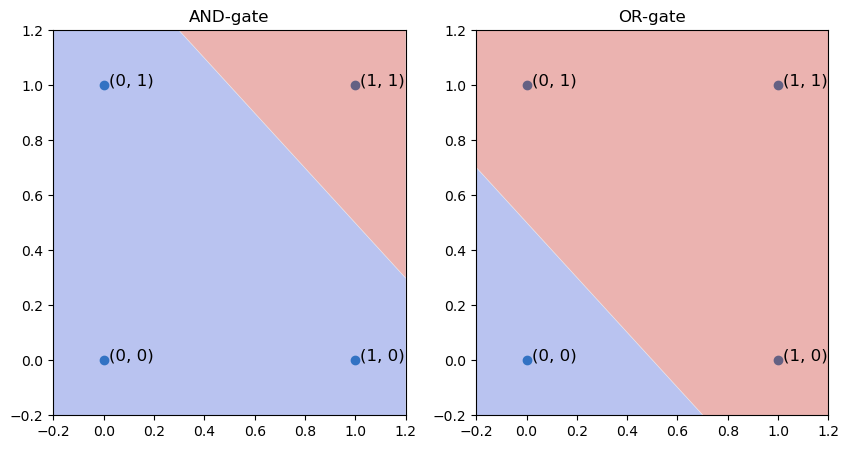

In [3]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    axes[0].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
    axes[1].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

axes[0].set_title("AND-gate")
axes[1].set_title("OR-gate")

axes[0].contourf(xx, yy, and_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
axes[1].contourf(xx, yy, or_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
plt.plot()

Some observations:
- The perceptron is a model for an **articial neuron**. 
- The perceptron defines a **lineaire discriminant**, meaning that it cannot solve the non-linear XOR-gate. 
- Threshold function $f$ is a *hard* thresholding function. Later, we will look at the **sigmoid** function which is a *soft* thresholding function.

**Key idea**: we can stack multiple perceptron to form a layer of perceptron. This allows us to solve non-linear problems (such as XOR). 

### Exclusive Or (XOR)

|x1|x2|XOR|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

$x_1 \text{ XOR } x_2 = (x_1 \text{ AND } \text{ NOT } x_2) \text{ OR } (\text{ NOT } x_1 \text{ AND } x_2)$

$x_1 \oplus x_2 = (x_1 \land \neg x_2) \lor (\neg x_1 \land x_2)$

#### Exercise: design the XOR gate

Requirements
- Design a NOT-gate in the form of $f(w x + b)$, where $f$ is the thresholding function and $w, b$ are the parameters of this model.
- Combine the AND-gate, OR-gate, and NOT-gate to get the XOR-gate

```python
f = np.vectorize(lambda x: 1 if x > 0 else 0)
and_gate = lambda x1, x2: f(1*x1 + 1*x2 - 1.5)
or_gate  = lambda x1, x2: f(1*x1 + 1*x2 - 0.5)
```

In [4]:
not_gate = lambda x: ()

xor_gate = lambda x1, x2: ()

print(f"XOR gate outputs:  {xor_gate(X[:, 0], X[:, 1])}")

XOR gate outputs:  ()


```














```

In [7]:
# NOT gate
not_gate = lambda x: f(-1*x + 0.5)

not_gate(0), not_gate(1)

(array(1), array(0))

In [8]:
xor_gate = lambda x1, x2: or_gate(and_gate(x1, not_gate(x2)), and_gate(not_gate(x1), x2))

print(f"XOR gate outputs:  {xor_gate(X[:, 0], X[:, 1])}")

XOR gate outputs:  [0 1 1 0]


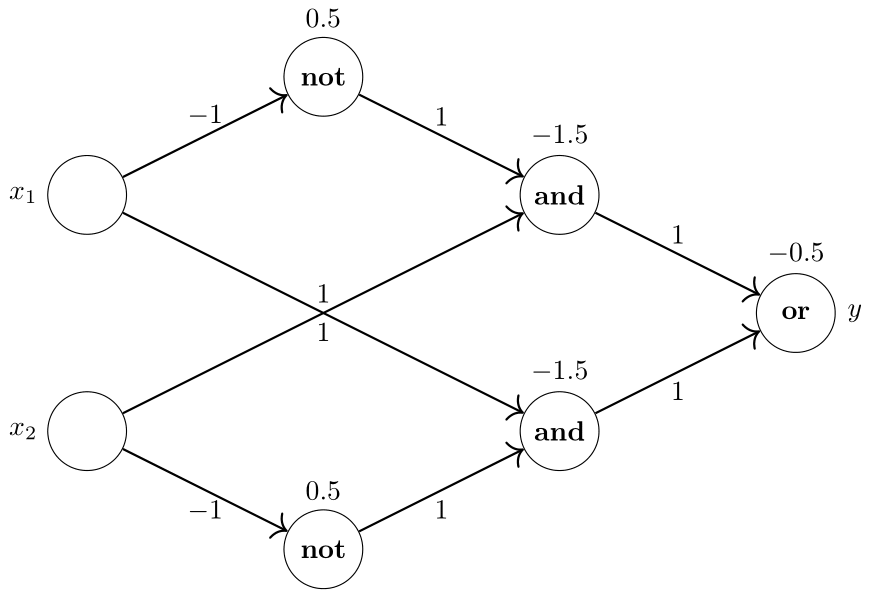

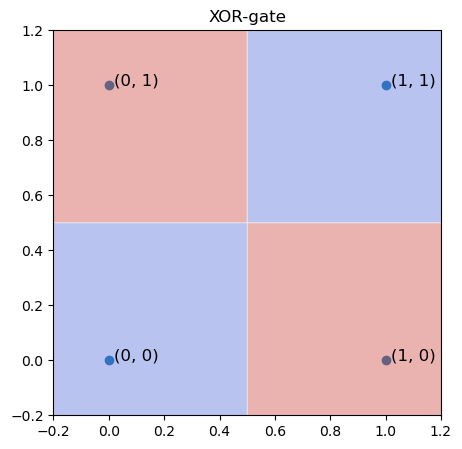

In [9]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    plt.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

plt.title("XOR-gate")
plt.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
plt.show()

### Example of a simple neural network

Example network:
- 1 input `x`
- 1 'hidden' layer with parameter `w1`
- 1 output `y` with parameter `w2`
- sigmoid activation function instead of hard threshold function
$$
    \text{sigmoid}(x) = \dfrac{1}{1 + e^{-x}}
$$

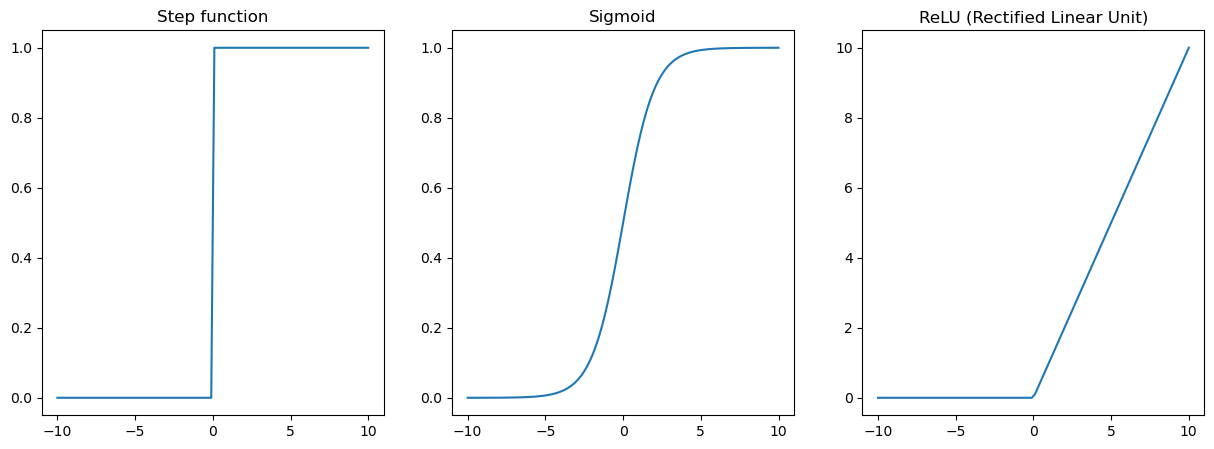

In [106]:
x = np.linspace(-10, 10, 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sigmoid = lambda x: 1/(1+np.exp(-x))

ax1.plot(x, f(x))
ax1.set_title("Step function")
ax2.plot(x, sigmoid(x))
ax2.set_title("Sigmoid")
ax3.plot(x, x * (x > 0))
ax3.set_title("ReLU (Rectified Linear Unit)")
plt.show()

### Information flow
```
                ___________             
    x -- w1 --> | sigmoid | -- w2 --> y
                -----------            
```
In mathematical notation:

$z = \text{sigmoid}(w_1 x)$

$y = w_2 z$

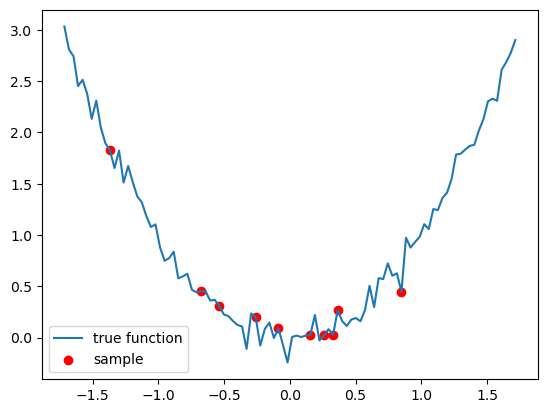

In [10]:
g = lambda x: x**2

x = np.linspace(-10, 10, 100)
x = (x - x.mean()) / x.std()
y = g(x) + np.random.normal(0, 0.1, size=x.shape[0])

idx = np.random.choice(x.shape[0], size=10)
x_train = x[idx]
y_train = y[idx]

plt.plot(x, y, label='true function')
plt.scatter(x_train, y_train, c='r', label='sample')
plt.legend()

# weights initialised with mean 0 and variance 2
w1 = np.random.normal(0, 2)
w2 = np.random.normal(0, 2)

We use the Mean-Squared-Error (MSE) loss function to capture how much of the predictions are wrong
$$
    MSE(\textbf{y}, \hat{\textbf{y}}) = \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

In [11]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# feedforward model
def predict(x, w1, w2):
    z = sigmoid(x * w1)
    y = z * w2
    return z, y

# MSE loss function
loss_func = lambda y_true, y_pred: 1/y_true.shape[0] * np.sum((y_true - y_pred)**2, axis=-1)

Initially, the weights are not (yet) correct, as seen by the high MSE loss

In [12]:
_, y_pred = predict(x_train, w1, w2)
loss = loss_func(y_train, y_pred)
loss

2.784225699394263

For many combinations of `w1` and `w2`, we can compute the loss and visualize the loss *landschap*

(2.784225699394263, 0.9151458179868072, -2.617843650262759)

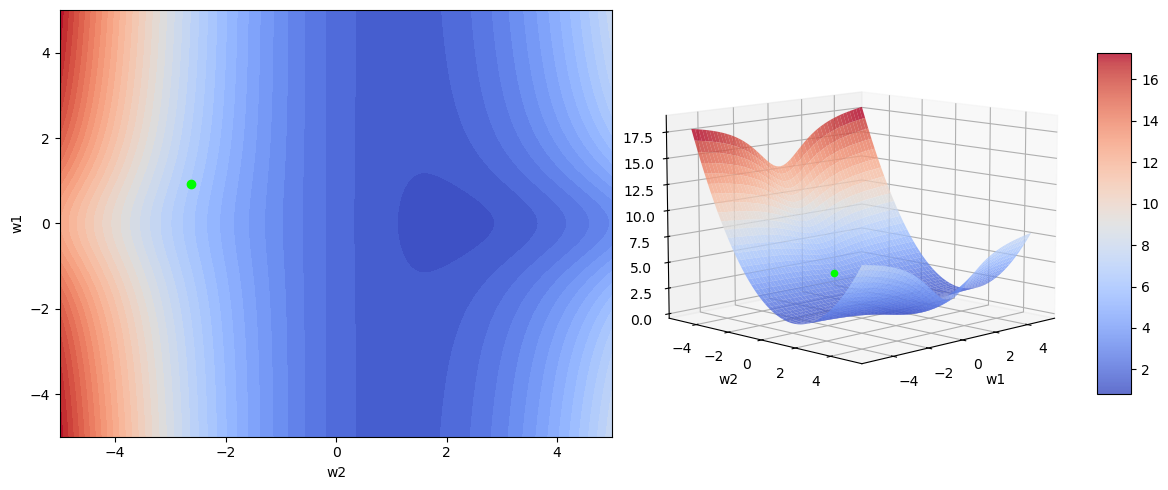

In [24]:
# try many w1, w2 pairs
w1_range = np.linspace(-5, 5, 300)
w2_range = np.linspace(-5, 5, 300)
w1_space, w2_space = np.meshgrid(w1_range, w2_range)

# get prediction for all (w1, w2) pairs 
_, y_preds = predict(x, w1_range[..., None], w2_range[..., None, None])
losses = loss_func(y, y_preds)

# predict train set
_, y_pred = predict(x_train, w1, w2)
sample_loss = loss_func(y_train, y_pred)

# loss landscape
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
cont1 = ax.contourf(w2_space, w1_space, losses, 40, cmap='coolwarm')
ax.set_xlabel("w2")
ax.set_ylabel("w1")

ax.scatter(w2, w1, c='lime')

# 3d plot
ax = fig.add_subplot(1, 2, 2, projection='3d', computed_zorder=False)
surf = ax.plot_surface(w1_space, w2_space, losses, cmap='coolwarm', alpha=0.8)
fig.colorbar(surf, shrink=0.8, aspect=10, ax=ax)
# ax.view_init(90, 0)
ax.view_init(10, 45)
ax.invert_xaxis()
ax.set_xlabel("w1")
ax.set_ylabel("w2")

ax.scatter([w1], [w2], [sample_loss], c='lime')

plt.tight_layout()
sample_loss, w1, w2

- Goal is to minimize the loss. 
- We use **gradient descent** by applying changes to `w1`, `w2` such that we are descending from the loss mountain.
- We see that if `w2 = 2` en `w1 = 0`, then we have descended the mountain

In [21]:
_, y_pred = predict(x_train, 0, 2)
sample_loss = loss_func(y_train, y_pred)
sample_loss

0.7593777795386378

### Optimization with gradient descent (backpropagation)

We apply calculus to find the gradient (derivative in many dimensions)

**Analogy**: you are blindfolded on top of a mountain and need to descent the mountain. 

One way to achieve this is to feel in every direction which direction has the largest slope (similar to hill-climbing) 

#### Key idea
Iterative process where we update the weights (`w1`, `w2`) with the **rate of change of the loss with respect to the weights**. 

We can describe our feedforward model in a sequential way:
\begin{align*}
    z &= \text{sigmoid}(w_1 \cdot x)\\
    \hat{y} &= w_2 \cdot z\\
    L &= \frac{1}{2} \sum_i (y_i - \hat{y}_i)^2
\end{align*}
For numerical convenience we use the factor $1/2$, instead of $1/N$. The learning rate $\eta$ will account for this.

Update rule $\Delta w_2$ is the learning rate $\eta$ times the derivative of $L$ with respect to $w_2$:
$$
    \Delta w_2 = \eta \sum_i (y_i - \hat{y}_i) z_i
$$
Update rule $\Delta w_1$ is the learning rate $\eta$ times the derivative of $L$ with respect to $w_1$:
$$
    \Delta w_1 = \eta \sum_i (y_i - \hat{y}_i) w_2 z_i(1-z_i)x_i
$$

**Important**:
- There can be multiple **local optima** 
- Chose a good learning rate $\eta$: 
  - High $\eta$ means that the parameter updates are large, potentially missing or over-shooting the minimum.
  - Low $\eta$ means that it can take a very long time before training is finished.

In [97]:
# re-initialize for convenience
w1 = np.random.normal(0, 2)
w2 = np.random.normal(0, 2)

In [66]:
EPOCHS = 10
learning_rate = 0.1

for e in range(EPOCHS):
    z, y_pred = predict(x_train, w1, w2)
    sample_loss = loss_func(y_train, y_pred)
    print(f"Epoch {e}, {sample_loss=}")
    
    # compute updates
    d_w2 = learning_rate * np.sum((y_train - y_pred) * z)
    d_w1 = learning_rate * np.sum((y_train - y_pred) * w2 * z * (1-z) * x_train)

    # update parameters
    w1 += d_w1
    w2 += d_w2

Epoch 0, sample_loss=0.18186261490043004
Epoch 1, sample_loss=0.18186216306926734
Epoch 2, sample_loss=0.1818617177319454
Epoch 3, sample_loss=0.18186127879037975
Epoch 4, sample_loss=0.1818608461480682
Epoch 5, sample_loss=0.18186041971006334
Epoch 6, sample_loss=0.18185999938294528
Epoch 7, sample_loss=0.18185958507479513
Epoch 8, sample_loss=0.1818591766951685
Epoch 9, sample_loss=0.18185877415507035


## Scaling up

- If we give the model more parameters, it will have higher capacity to learn things 
- We can organize multiple perceptron in a hidden layer

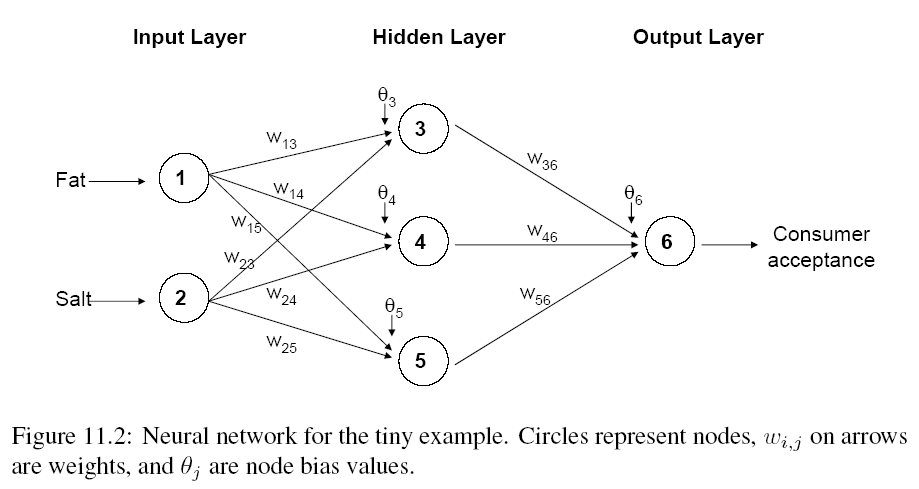

If we want to compute hidden layer node 3 ($\textbf{h}_3$):
\begin{align*}
    \textbf{h}_3 &= f(x_1 w_{13} + x_2 w_{23} + \theta_3)\\
    &= f(\underbrace{\begin{bmatrix} w_{13} & w_{23} & \theta_3 \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix}}_{\text{dot product}})
\end{align*}

If we want to compute the entire hidden layer ($\textbf{h}_3, \textbf{h}_4, \textbf{h}_5$), then we can take the matrix product:
\begin{align*}
    \textbf{z} &= \underbrace{\begin{bmatrix} 
        w_{13} & w_{23} & \theta_3 \\
        w_{14} & w_{24} & \theta_4 \\
        w_{15} & w_{25} & \theta_5 \\
    \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix}}_{\text{matrix-vector product}}\\
    \textbf{z} &= \textbf{W} \textbf{x}\\
    \textbf{h} &= f(\textbf{z})
\end{align*}


http://matrixmultiplication.xyz/

In [67]:
W = np.array([
    [1,  0,  2],
    [-1, 2, -3],
    [3,  0, -4]
])

x = np.array([-3, 2, 1])

z = W @ x

h = f(z)
h

array([0, 1, 0])

## Scaling up the XOR problem

In [157]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y = np.array([0, 1, 1, 0])

H_DIM = 8 # hyperparameter

W1 = np.random.normal(0, 2, size=(H_DIM, 2))
b1 = np.random.normal(0, 2, size=(H_DIM, 1))

W2 = np.random.normal(0, 2, size=(1, H_DIM))
b2 = np.random.normal(0, 2, size=(1, 1))

h = sigmoid(W1 @ X.T + b1)
y_pred = W2 @ h + b2

y_pred

array([[-0.33844109, -0.55968644,  0.17656228, -0.34213094]])

In [611]:
EPOCHS = 10
learning_rate = 0.1

for e in range(EPOCHS):
    # feed forward pass
    h = sigmoid(W1 @ X.T + b1)
    y_pred = W2 @ h + b2

    sample_loss = 0.5 * np.sum((y - y_pred)**2)
    print(f"Epoch {e}, {sample_loss=}, \t {y_pred=}")
    
    # backward pass
    d_W2 = learning_rate * np.sum((y - y_pred) * h, axis=1)
    d_b2 = learning_rate * np.sum(y - y_pred)
    
    d_W1 = learning_rate * ((y - y_pred) * W2.T * h * (1-h)) @ X
    d_b1 = learning_rate * np.sum((y - y_pred) * W2.T * (h * (1-h)), axis=1, keepdims=True)

    # update parameters
    W1 += d_W1
    W2 += d_W2
    b1 += d_b1
    b2 += d_b2

Epoch 0, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.55111512e-16]])
Epoch 1, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.55111512e-16]])
Epoch 2, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.55111512e-16]])
Epoch 3, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.55111512e-16]])
Epoch 4, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.55111512e-16]])
Epoch 5, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.55111512e-16]])
Epoch 6, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.55111512e-16]])
Epoch 7, sample_loss=2.902761612180442e-30, 	 y_pred=array([[1.55431223e-15, 1.00000000e+00, 1.00000000e+00, 5.

## Sklearn implementation

Iteration 1, loss = 0.76887084
Iteration 2, loss = 0.74766157
Iteration 3, loss = 0.72789338
Iteration 4, loss = 0.71311723
Iteration 5, loss = 0.70033520
Iteration 6, loss = 0.68898221
Iteration 7, loss = 0.67944246
Iteration 8, loss = 0.67077025
Iteration 9, loss = 0.66028029
Iteration 10, loss = 0.64949242
Iteration 11, loss = 0.63839824
Iteration 12, loss = 0.62759432
Iteration 13, loss = 0.61663920
Iteration 14, loss = 0.60519405
Iteration 15, loss = 0.59319013
Iteration 16, loss = 0.58213859
Iteration 17, loss = 0.57146071
Iteration 18, loss = 0.55993244
Iteration 19, loss = 0.54814441
Iteration 20, loss = 0.53601569
Iteration 21, loss = 0.52308136
Iteration 22, loss = 0.50968936
Iteration 23, loss = 0.49559315
Iteration 24, loss = 0.48057026
Iteration 25, loss = 0.46493024
Iteration 26, loss = 0.44891421
Iteration 27, loss = 0.43218327
Iteration 28, loss = 0.41552703
Iteration 29, loss = 0.39855856
Iteration 30, loss = 0.38095785
Iteration 31, loss = 0.36302146
Iteration 32, los

1.0

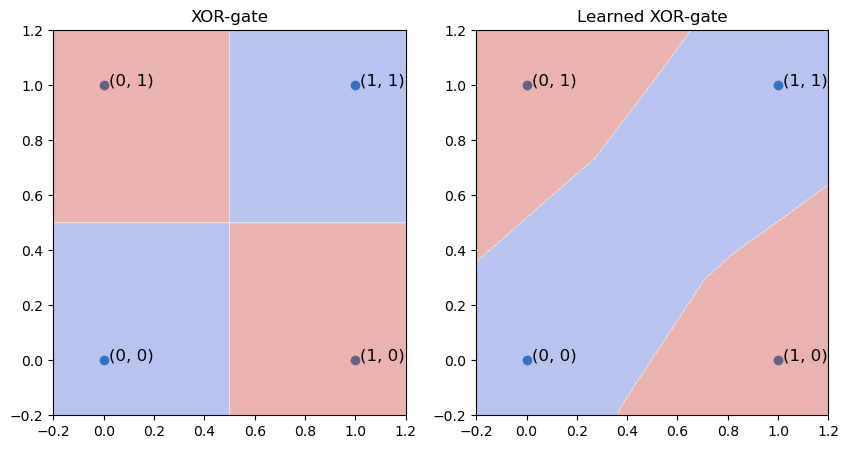

In [612]:
from sklearn.neural_network import MLPClassifier

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y = np.array([0, 1, 1, 0])

xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# hand-chosen weights
ax1.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax1.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax1.set_title("XOR-gate")
ax1.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

# train model and predict
mlp = MLPClassifier(tol=1e-6, max_iter=1000, activation="relu", learning_rate_init=0.01, learning_rate='adaptive', 
                    hidden_layer_sizes=[16, 16], verbose=True, solver="adam").fit(X, y)
y_pred = mlp.predict(D)

ax2.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax2.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax2.set_title("Learned XOR-gate")
ax2.contourf(xx, yy, y_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

mlp.score(X, y)

### Synthetische classificatie 

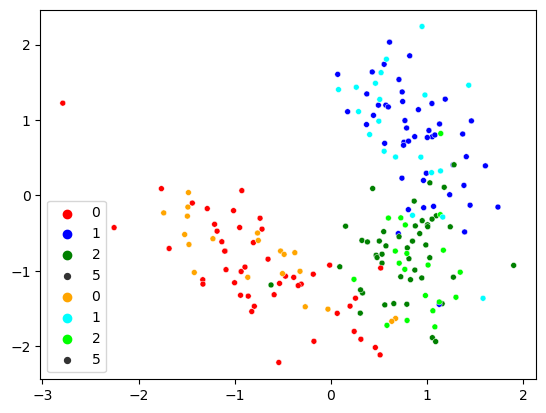

In [616]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# maak classificatie dataset 
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1
)
X = (X - X.mean())/X.std() # standaardiseer dataset (mean 0, variance 1)

# maak meshgrid om beslisgrenzen te laten zien
xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()
xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

# split de dataset in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, size=5, palette=['r', 'b', 'g'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, size=5, palette=['orange', 'cyan', 'lime'])
plt.show()

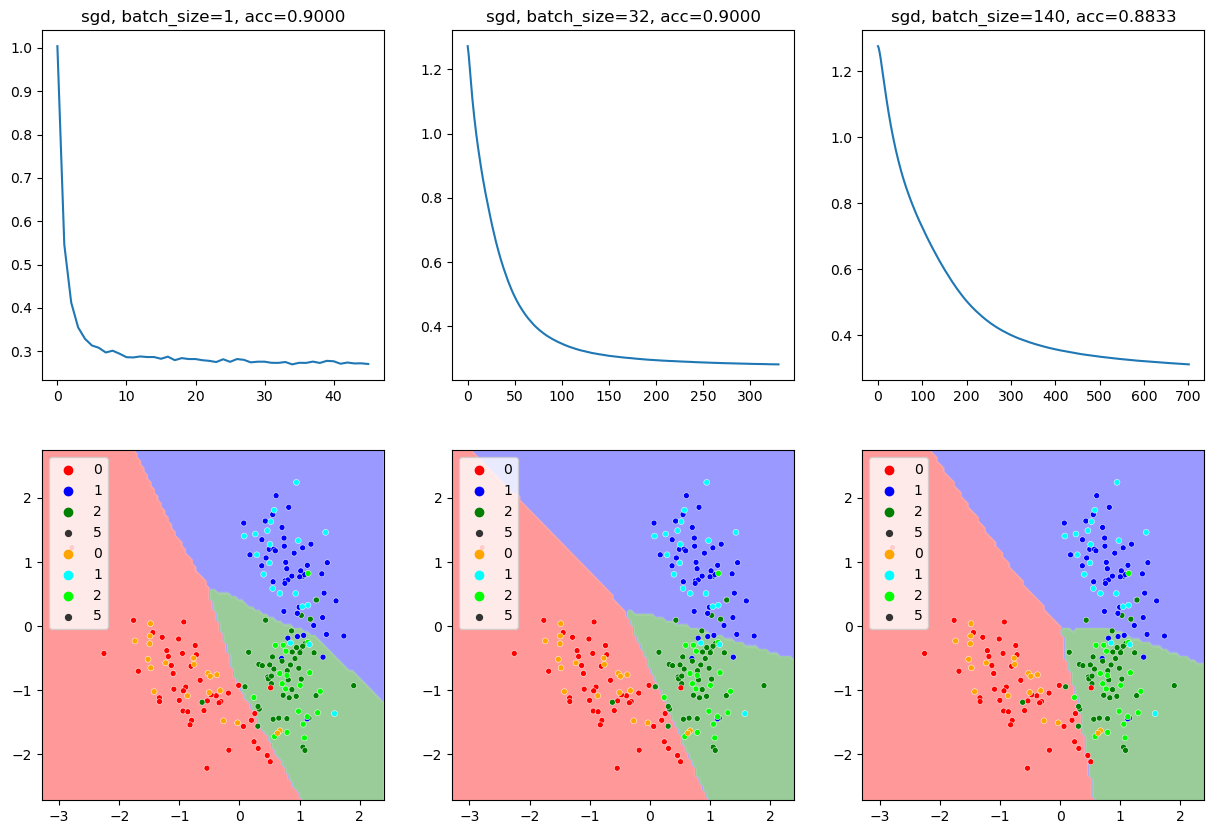

In [622]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue', 'green'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

batch_sizes = [1, 32, X_train.shape[0]]

for i, b in enumerate(batch_sizes):
    mlp = MLPClassifier([10], batch_size=b, solver='sgd', max_iter=1000).fit(X, y)
    acc = mlp.score(X_test, y_test)
    axes[0, i].set_title(f"sgd, batch_size={b}, {acc=:.4f}")
    sns.lineplot(x=range(len(mlp.loss_curve_)), y=mlp.loss_curve_, ax=axes[0, i])

    y_pred = mlp.predict(D)
    
    axes[1, i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], size=5, hue=y_train, palette=['r', 'b', 'g'], ax=axes[1, i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], size=5, hue=y_test, palette=['orange', 'cyan', 'lime'], ax=axes[1, i])

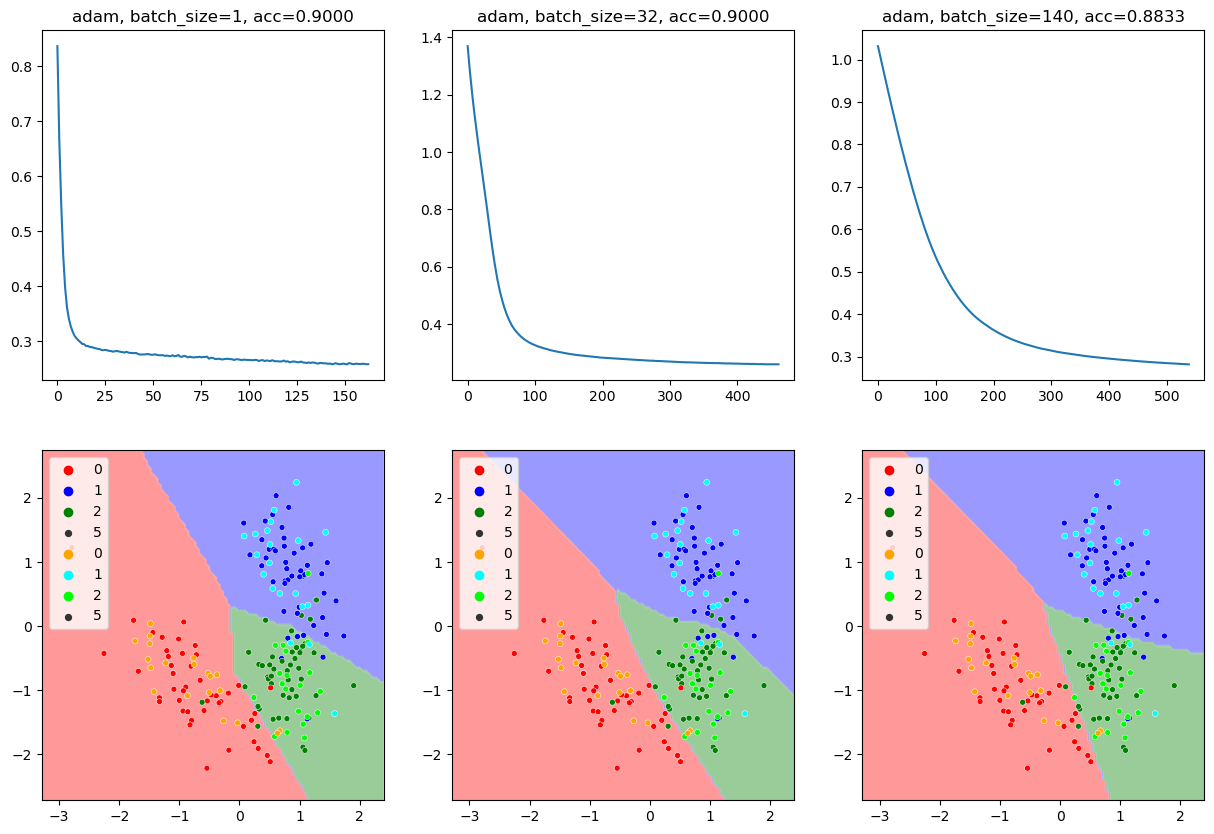

In [623]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue', 'green'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

batch_sizes = [1, 32, X_train.shape[0]]

for i, b in enumerate(batch_sizes):
    mlp = MLPClassifier([10], batch_size=b, solver='adam', max_iter=1000).fit(X, y)
    acc = mlp.score(X_test, y_test)
    axes[0, i].set_title(f"adam, batch_size={b}, {acc=:.4f}")
    sns.lineplot(x=range(len(mlp.loss_curve_)), y=mlp.loss_curve_, ax=axes[0, i])

    y_pred = mlp.predict(D)
    
    axes[1, i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], size=5, hue=y_train, palette=['r', 'b', 'g'], ax=axes[1, i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], size=5, hue=y_test, palette=['orange', 'cyan', 'lime'], ax=axes[1, i])